<a href="https://colab.research.google.com/github/thesubodh1/Experimentation/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Notebook we will try to find out if different ways if filling the missing values and converting objects into numbers has some impact on the models ptediction.

## We are going to try the following ways
1. Pandas
2. Sk Learn
3. Category

## We will be using the car sales data and try to predict the sales price of the car using the feature matrix

In [455]:
## let's create a empty dict to store scores
scores={}

In [456]:
# Import all the necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [457]:
# Lets import the data set
data = pd.read_csv("drive/MyDrive/Car_sales/car-sales-extended-missing-data.csv")

In [458]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [460]:
data.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [461]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


So we can see that Make and Colour columns are object which needs to be converted into numeric format and we also see that there are some missing values which needs to be filled

## 1. Dealing with missing values using `Pandas`


In [462]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [463]:
# lets fill the missing values using pandas

# We are going to remove the dataset with missing labels i.e missing price columns
data = data.dropna(subset=["Price"])


# 1. we will fill the non numeric missing values with the keyword `missing`
data["Make"] = data["Make"].fillna("missing")
data["Colour"] = data["Colour"].fillna("missing")

# 2. We will fill the missing numeric values with the median
data["Odometer (KM)"] = data["Odometer (KM)"].fillna(data["Odometer (KM)"].mean())

# 3. There is a Door value so in this case we will use 4
data["Doors"] = data["Doors"].fillna(4)


In [464]:
data.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [465]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           950 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


Since we have filled the missing values now lets convert the object data type into numeric form or lets OneHotEncode the data

In [466]:
# first lets split the data into deature and labels matrix i.e x and y
x = data.drop("Price",axis=1)
y = data["Price"]

In [467]:
# Now lets oneHotEncode the data
categorical_features = ["Make","Colour"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

### Now lets model the data
>This is regression problem (We have to predict a price (number)) so we are going to use RandomForestRegressor

In [468]:
# lets split the data into train and test split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

In [469]:
# lets instinciate the model
model = RandomForestRegressor()

# fit the model
model.fit(x_train,y_train)

# score the model
model.score(x_test,y_test)

0.22153442324566797

In [470]:
score = f"{model.score(x_test,y_test)*100:.2f}"
print(f"The score of the model with pandas Missing values technique is: {score}%")
scores[" Basic Pandas"] = score
scores

The score of the model with pandas Missing values technique is: 22.15%


{' Basic Pandas': '22.15'}

## 2.  Now lets go to another method where we will fill the missing values using `sklearn`

In [471]:
data_1 = pd.read_csv("drive/MyDrive/Car_sales/car-sales-extended-missing-data.csv")

In [472]:
data_1.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [473]:
data_1.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [474]:
# lets drop the columns with missing labels
data_1 = data_1.dropna(subset=["Price"])

# lets split the data into x and y
x = data_1.drop("Price",axis=1)
y = data_1["Price"]

In [475]:
# Now lets start with the missing values

cat_impute = SimpleImputer(strategy="constant",fill_value="missing")
door_impute = SimpleImputer(strategy="constant",fill_value=4)
num_impute  = SimpleImputer(strategy="mean")

cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

transformer = ColumnTransformer([("cat_impute",cat_impute,categorical_features),("num_impute",num_impute,num_feature),("door_impute",door_impute,door_feature)])
transformed_data = transformer.fit_transform(x)
transformed_data


array([['Honda', 'White', 35431.0, 4.0],
       ['BMW', 'Blue', 192714.0, 5.0],
       ['Honda', 'White', 84714.0, 4.0],
       ...,
       ['Nissan', 'Blue', 66604.0, 4.0],
       ['Honda', 'White', 215883.0, 4.0],
       ['Toyota', 'Blue', 248360.0, 4.0]], dtype=object)

In [476]:
x = pd.DataFrame(transformed_data,columns=["Make","Colour","Odometer (KM)","Doors"])
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [477]:
x.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0


In [478]:
# now lets convert the object into numeric form
cat_features = ["Make","Colour"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,cat_features)],remainder="passthrough")
new_x = transformer.fit_transform(x)

In [479]:
new_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 4.0],
       [1.0, 0.0, 0.0, ..., 0.0, 192714.0, 5.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 4.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 4.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 4.0]], dtype=object)

In [480]:
# lets split the data into train and test split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size=0.2)

# lets fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)

# lets score the model
model.score(x_test,y_test)

0.22153442324566797

In [481]:
score = f"{model.score(x_test,y_test)*100:.2f}"
print(f"The accuracy of the model using sklearn imputer is: {score}%")
scores["Scikit Learn"] = score
scores

The accuracy of the model using sklearn imputer is: 22.15%


{' Basic Pandas': '22.15', 'Scikit Learn': '22.15'}

## 3. Now we are going to use pandas category to fill the missing values and convert object into numbers

In [482]:
# lets import the data once again
data_2 = pd.read_csv("drive/MyDrive/Car_sales/car-sales-extended-missing-data.csv")
data_2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [483]:
data_2.isna().sum(),data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


(Make             49
 Colour           50
 Odometer (KM)    50
 Doors            50
 Price            50
 dtype: int64,
 None)

In [484]:
# lets remove the columns with missing labels i.e price
data_2 = data_2.dropna(subset=["Price"])

In [485]:
# lets create a function to preprocess the data
def preprocess_data(data):
  for labels,contents in data.items():
    if pd.api.types.is_numeric_dtype(contents):
      if pd.isnull(contents).sum():
        # fill the missing numeric values with mean
        data[labels] = contents.fillna(contents.mean())
    else:
      # convert string into category and fill missing
      data[labels] = pd.Categorical(contents).codes+1

  return data

In [486]:
data_3 = preprocess_data(data_2)
data_3

/tmp/ipython-input-485-1670437513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[labels] = pd.Categorical(contents).codes+1
/tmp/ipython-input-485-1670437513.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[labels] = pd.Categorical(contents).codes+1
/tmp/ipython-input-485-1670437513.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Make,Colour,Odometer (KM),Doors,Price
0,2,5,35431.0,4.0,15323.0
1,1,2,192714.0,5.0,19943.0
2,2,5,84714.0,4.0,28343.0
3,4,5,154365.0,4.0,13434.0
4,3,2,181577.0,3.0,14043.0
...,...,...,...,...,...
995,4,1,35820.0,4.0,32042.0
996,0,5,155144.0,3.0,5716.0
997,3,2,66604.0,4.0,31570.0
998,2,5,215883.0,4.0,4001.0


In [487]:
data_3.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [488]:
data_3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           950 non-null    int8   
 1   Colour         950 non-null    int8   
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), int8(2)
memory usage: 31.5 KB


In [489]:
data_3.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,2,5,35431.000000,4.0,15323.0
1,1,2,192714.000000,5.0,19943.0
2,2,5,84714.000000,4.0,28343.0
3,4,5,154365.000000,4.0,13434.0
4,3,2,181577.000000,3.0,14043.0
5,2,4,42652.000000,4.0,23883.0
6,4,2,163453.000000,4.0,8473.0
7,2,5,130987.447894,4.0,20306.0
8,0,5,130538.000000,4.0,9374.0
9,2,2,51029.000000,4.0,26683.0


In [490]:
# lets split the data feature and label matrix X and Y
x = data_3.drop("Price",axis=1)
y = data_3["Price"]

# split the data into train and test split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create and fit the model
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21410827305814195

In [491]:
score= f"{model.score(x_test,y_test)*100:.2f}"
print(f"The accuracy of the model using the pandas category is {score}%")
scores["Category"] = score

The accuracy of the model using the pandas category is 21.41%


In [492]:
scores

{' Basic Pandas': '22.15', 'Scikit Learn': '22.15', 'Category': '21.41'}

In [493]:
scores = pd.DataFrame(scores,index=["Accuracy"])

In [494]:
scores = pd.DataFrame(scores.astype(float),index=["Accuracy"])
scores

,Basic Pandas,Scikit Learn,Category
Accuracy,22.15,22.15,21.41


<Axes: >

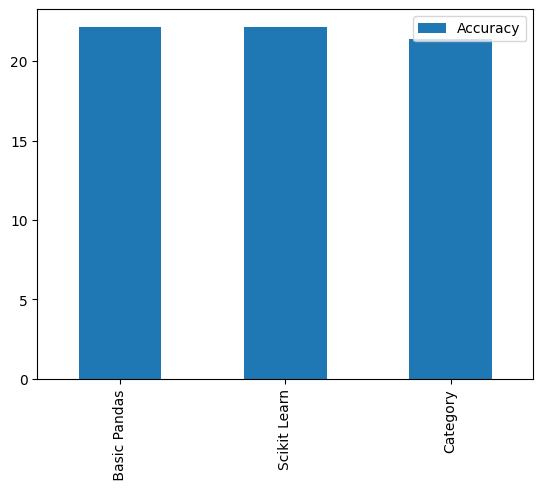

In [495]:
scores.T.plot(kind="bar")